In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [3]:
# Load connectome and normalize it

W=np.loadtxt("../Data/connectivity_matrix/weights.txt")
W=W/W.sum(axis=1)[:,None]

In [4]:
# Create brain object and set its parameters

brain=HTC.Brain(W)
#brain.set_netowrk_parameters(2/998,(2/998)**(1/5),(2/998)**(1/5)/(1+2*(2/998)**(1/5))/1.2)

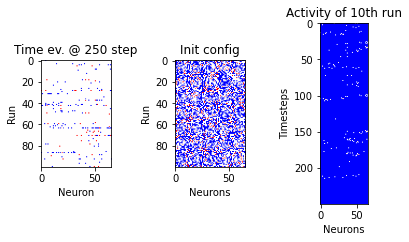

In [5]:
# Generate initial configuration with 10% active neurons

states_orig = HTC.generate_initial_conf(active_frac=0.1, n_neurons=66, n_runs=100) # with random configurations


# Evolve over time the states (save every step in activity matrix)
brain.set_netowrk_parameters(r1=2e-3, r2=0.288, tc=0.15)

n_timesteps=250
n_runs=100
n_neurons=brain.n_neurons
activity=np.zeros((n_timesteps,n_runs, brain.n_neurons)) #storing time, run and activity
states=states_orig

for t in range(n_timesteps):
    states, activity[t] = HTC.update_states(states=states,
                                            r1=brain.r1,r2= brain.r2,tc= brain.tc,W= W)

    
fig,ax=plt.subplots(1,3)

ax[0].set_xlabel("Neuron")
ax[0].set_ylabel("Run")
ax[0].set_title("Time ev. @ "+str(n_timesteps)+" step")
ax[0].imshow(states, cmap='bwr')



run=10
ax[2].set_title("Activity of "+str(run)+"th run")
ax[2].set_ylabel("Timesteps")
ax[2].set_xlabel("Neurons")
ax[2].imshow(activity[:,run], cmap='bwr')



ax[1].set_xlabel("Neurons")
ax[1].set_ylabel("Run")
ax[1].set_title("Init config")
ax[1].imshow(states_orig, cmap='bwr')

fig.tight_layout(pad=3.0)

plt.show()

In [9]:
%%time
tc, a,sigma_a=brain.simulation(active_frac=0.1, n_runs=100,
                      tmin=0.005, tmax=0.2, delta_tc=0.005,
                      dt=0.1, n_timesteps=6000)

CPU times: user 1min, sys: 1.92 s, total: 1min 2s
Wall time: 1min 2s


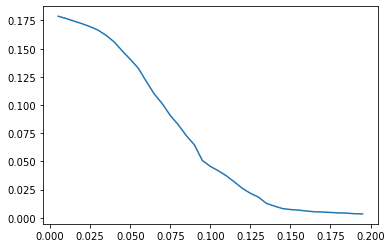

In [10]:
plt.plot(tc,a)

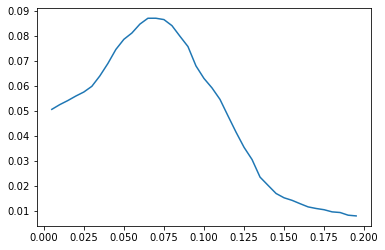

In [11]:
plt.plot(tc,sigma_a)